<a href="https://colab.research.google.com/github/LISHITHA33/Breast-Cancer-Detection-Capstone-Project/blob/main/Breast_Cancer_Detection_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Detection Capstone Project**

Importing Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Loading Data into variable

In [2]:
breast_cancer=load_breast_cancer()
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [3]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

Storing features in x

In [4]:
x=breast_cancer.data
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Storing labels in y

In [5]:
y=breast_cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Printing names of features

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Checking Dimensions of x and y

In [7]:
print(x.shape,y.shape)

(569, 30) (569,)


Storing data as pandas dataframe to perform further operations

In [8]:
data=pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data['class']=breast_cancer.target

Printing the head of the dataset to have a look at the dataframe

In [9]:
#Top 10 values in the data
data.head(10)

mean radius  mean texture  ...  worst fractal dimension  class
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0
5        12.45         15.70  ...                  0.12440      0
6        18.25         19.98  ...                  0.08368      0
7        13.71         20.83  ...                  0.11510      0
8        13.00         21.82  ...                  0.10720      0
9        12.46         24.04  ...                  0.20750      0

[10 rows x 31 columns]

Having a look at details of the data

In [10]:
#Basic Descriptive statistics on the data
data.describe(include="all")

mean radius  mean texture  ...  worst fractal dimension       class
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]

DATA VISUALIZATION

Plotting a pair plot to see correlations between the independent and dependent variables
*This is used to show the numeric distribution in the scatter plot.*

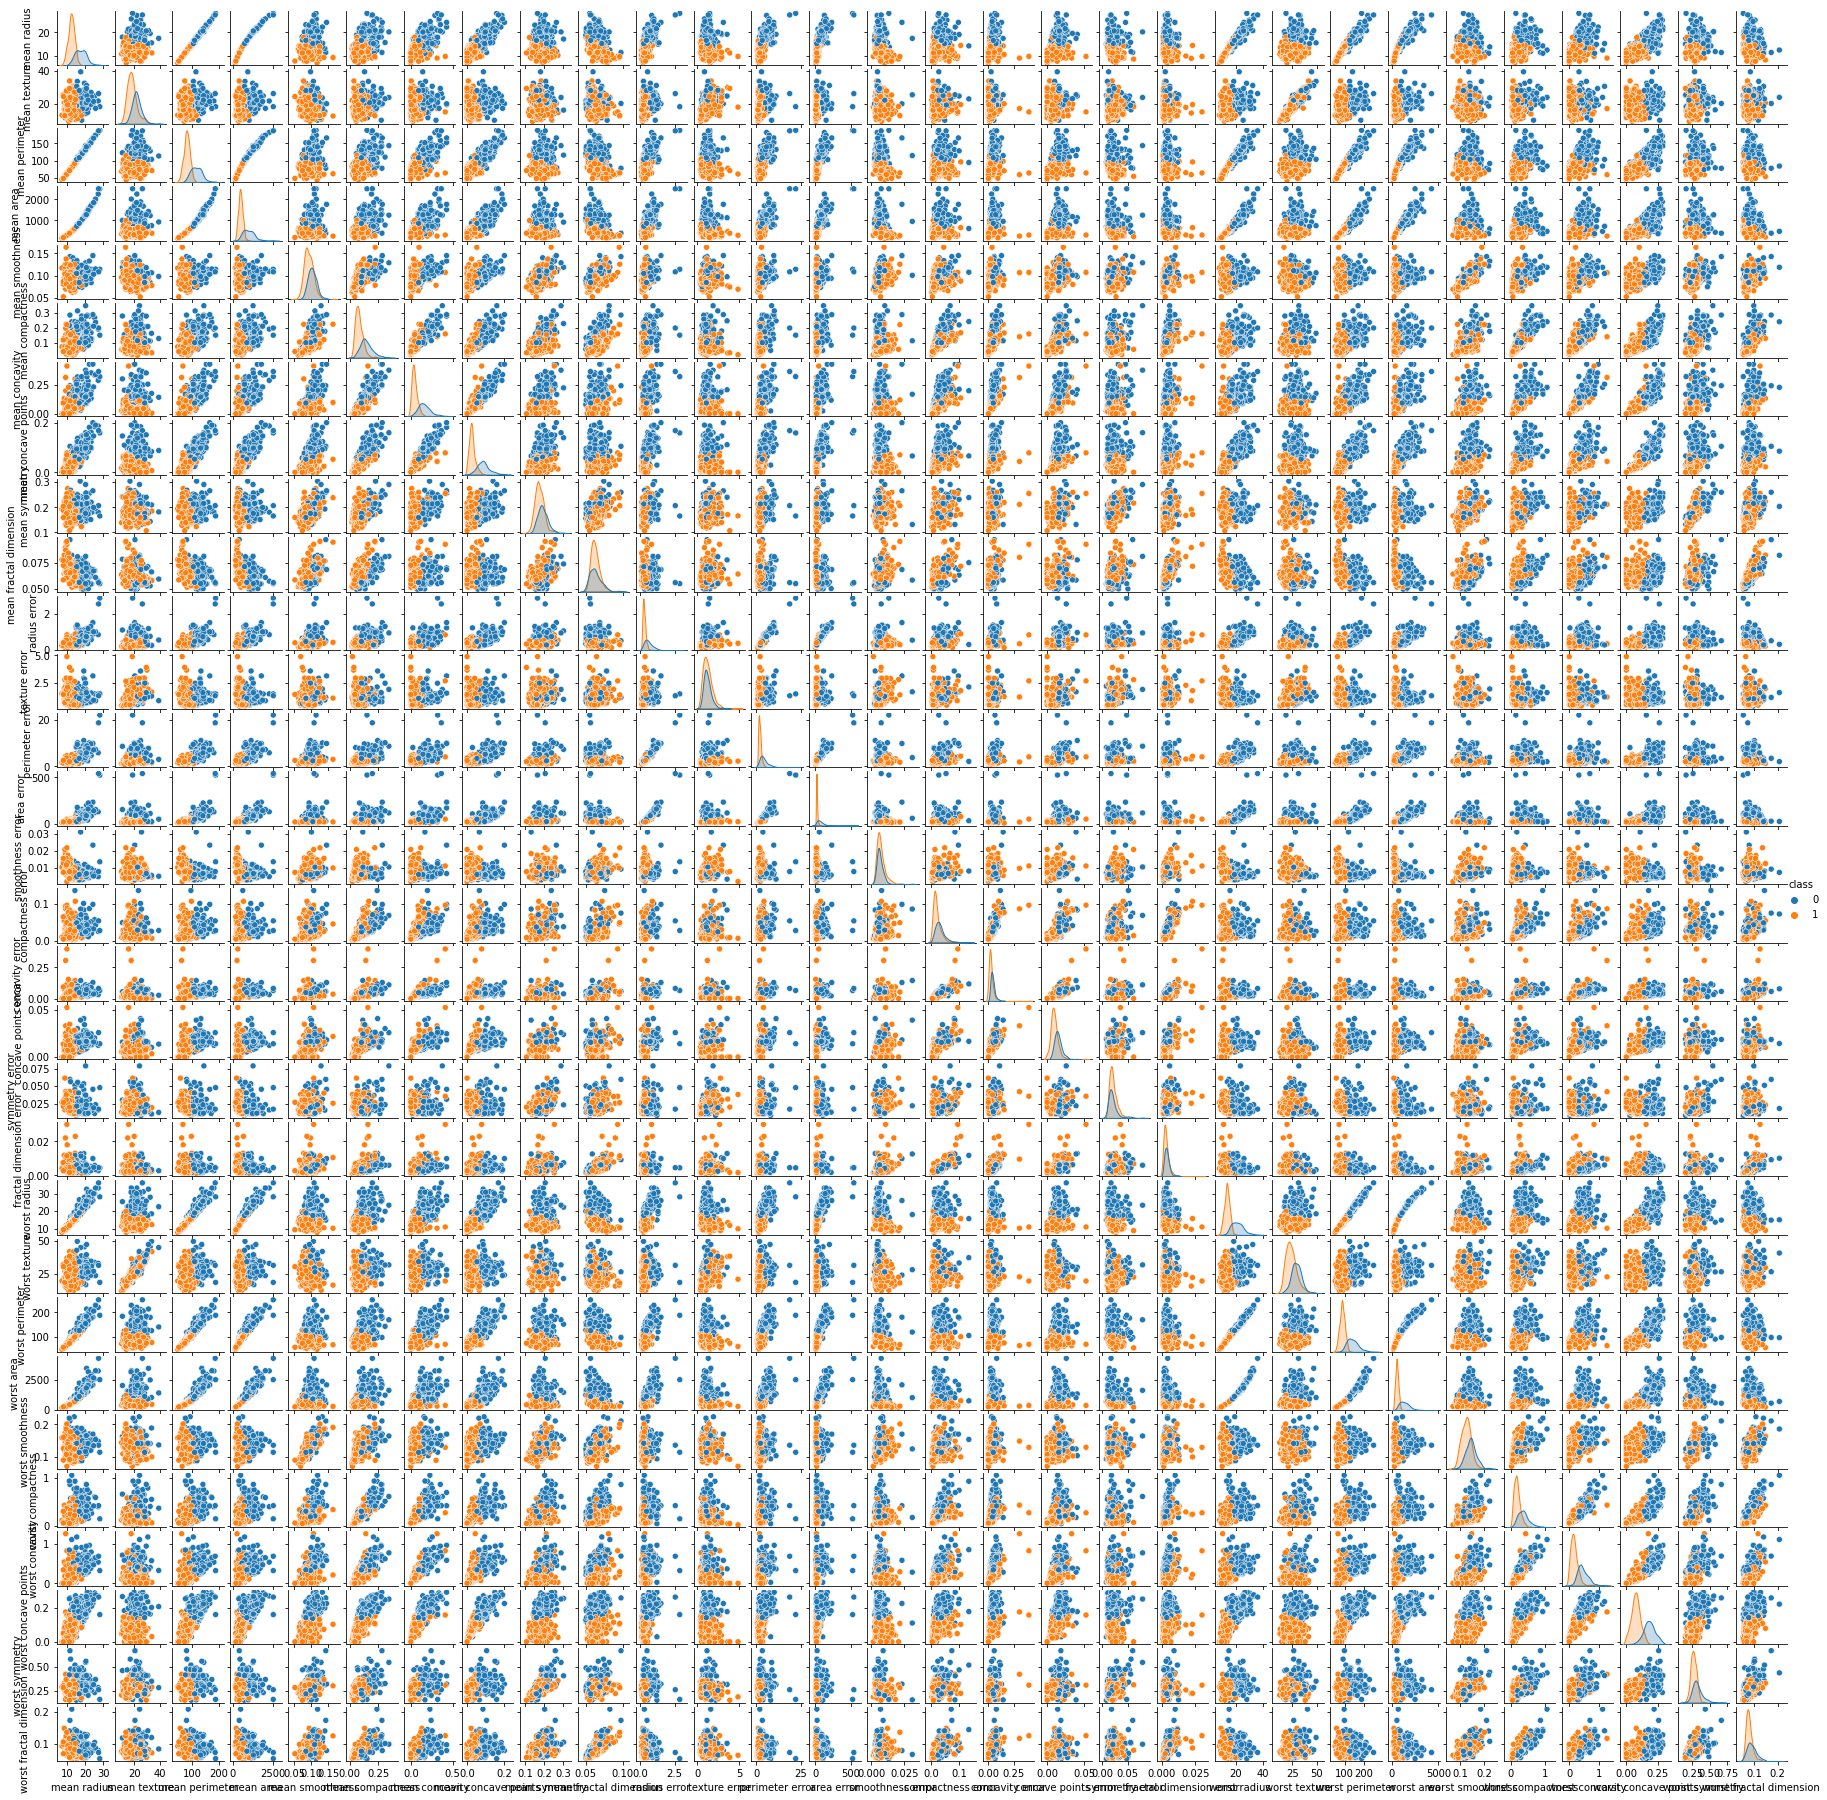

In [11]:
g=sns.pairplot(data,hue='class')
g.fig.set_size_inches(25,25)

Pair plot of sample feature of DataFrame
The pair plot showing malignant and benign tumor data distributed in two classes. It is easy to differentiate in the pair plot.

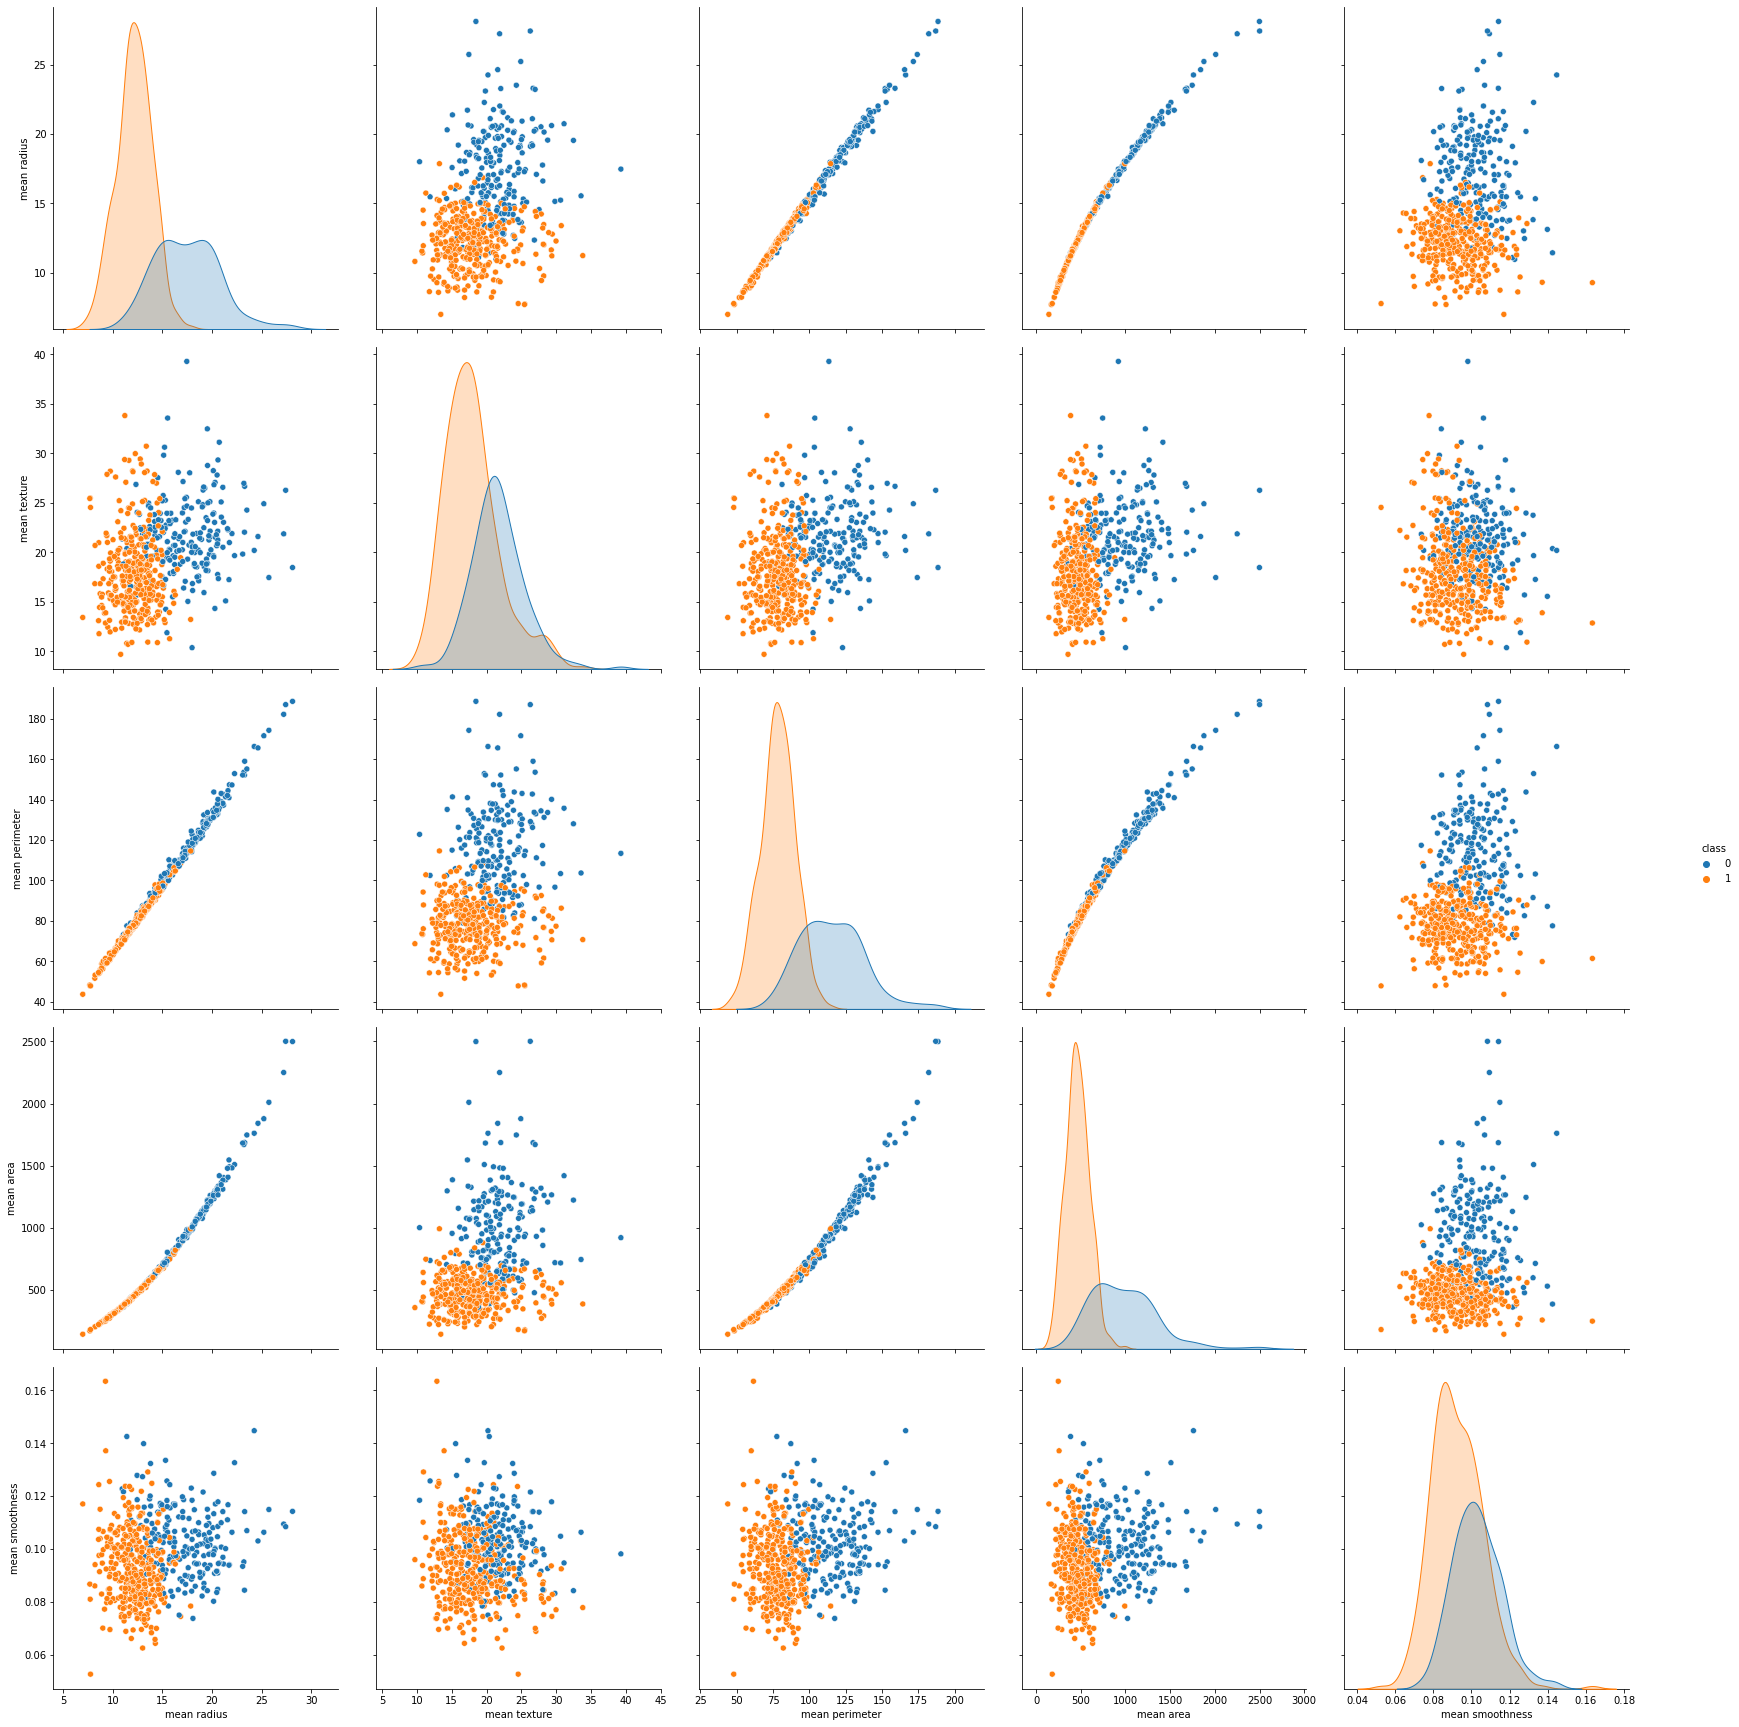

In [12]:
g=sns.pairplot(data,hue='class',vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
g.fig.set_size_inches(25,25)

Counterplot
Showing the total count of malignant and benign tumor patients in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


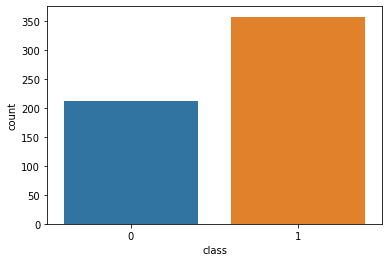

In [13]:
sns.countplot(data['class'])

In the below counterplot max samples mean radius is equal to 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


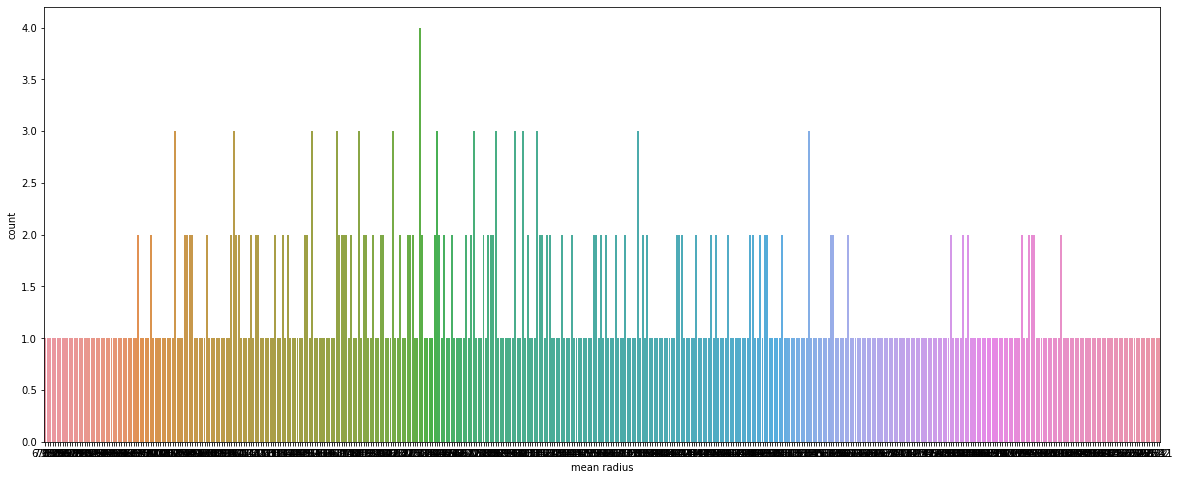

In [14]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(data['mean radius'])

**Heatmap**

Heatmap of breast cancer DataFrame:
In the below heatmap we can see the variety of different feature’s value. The value of feature ‘mean area’ and ‘worst area’ are greater than other and ‘mean perimeter’, ‘area error’, and ‘worst perimeter’ value slightly less but greater than remaining features.

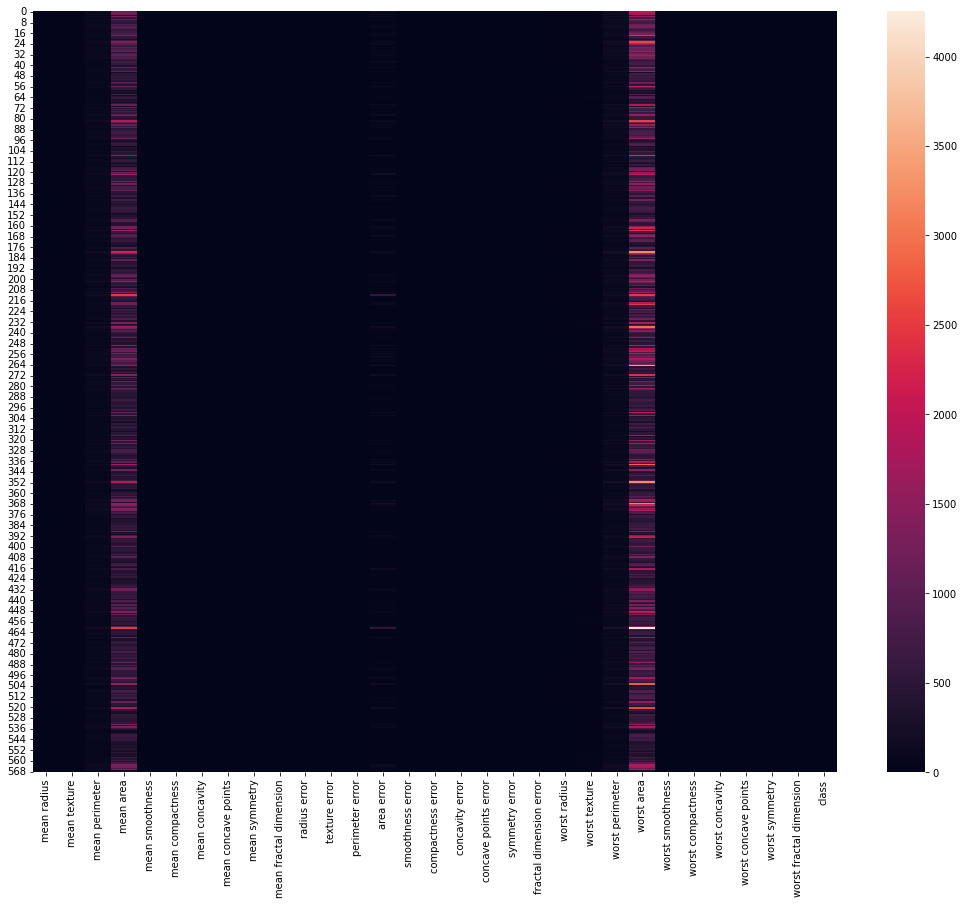

In [15]:
plt.figure(figsize=(18,14))
h=sns.heatmap(data)

Heatmap of a correlation matrix
To find a correlation between each feature and target we visualize heatmap using the correlation matrix.

In [16]:
data.corr()

mean radius  ...     class
mean radius                 1.000000  ... -0.730029
mean texture                0.323782  ... -0.415185
mean perimeter              0.997855  ... -0.742636
mean area                   0.987357  ... -0.708984
mean smoothness             0.170581  ... -0.358560
mean compactness            0.506124  ... -0.596534
mean concavity              0.676764  ... -0.696360
mean concave points         0.822529  ... -0.776614
mean symmetry               0.147741  ... -0.330499
mean fractal dimension     -0.311631  ...  0.012838
radius error                0.679090  ... -0.567134
texture error              -0.097317  ...  0.008303
perimeter error             0.674172  ... -0.556141
area error                  0.735864  ... -0.548236
smoothness error           -0.222600  ...  0.067016
compactness error           0.206000  ... -0.292999
concavity error             0.194204  ... -0.253730
concave points error        0.376169  ... -0.408042
symmetry error             -0.104321  ...  0.006522
fractal dimension error    -0.042641  ... -0.077972
worst radius                0.969539  ... -0.776454
worst texture               0.297008  ... -0.456903
worst perimeter             0.965137  ... -0.782914
worst area                  0.941082  ... -0.733825
worst smoothness            0.119616  ... -0.421465
worst compactness           0.413463  ... -0.590998
worst concavity             0.526911  ... -0.659610
worst concave points        0.744214  ... -0.793566
worst symmetry              0.163953  ... -0.416294
worst fractal dimension     0.007066  ... -0.323872
class                      -0.730029  ...  1.000000

[31 rows x 31 columns]

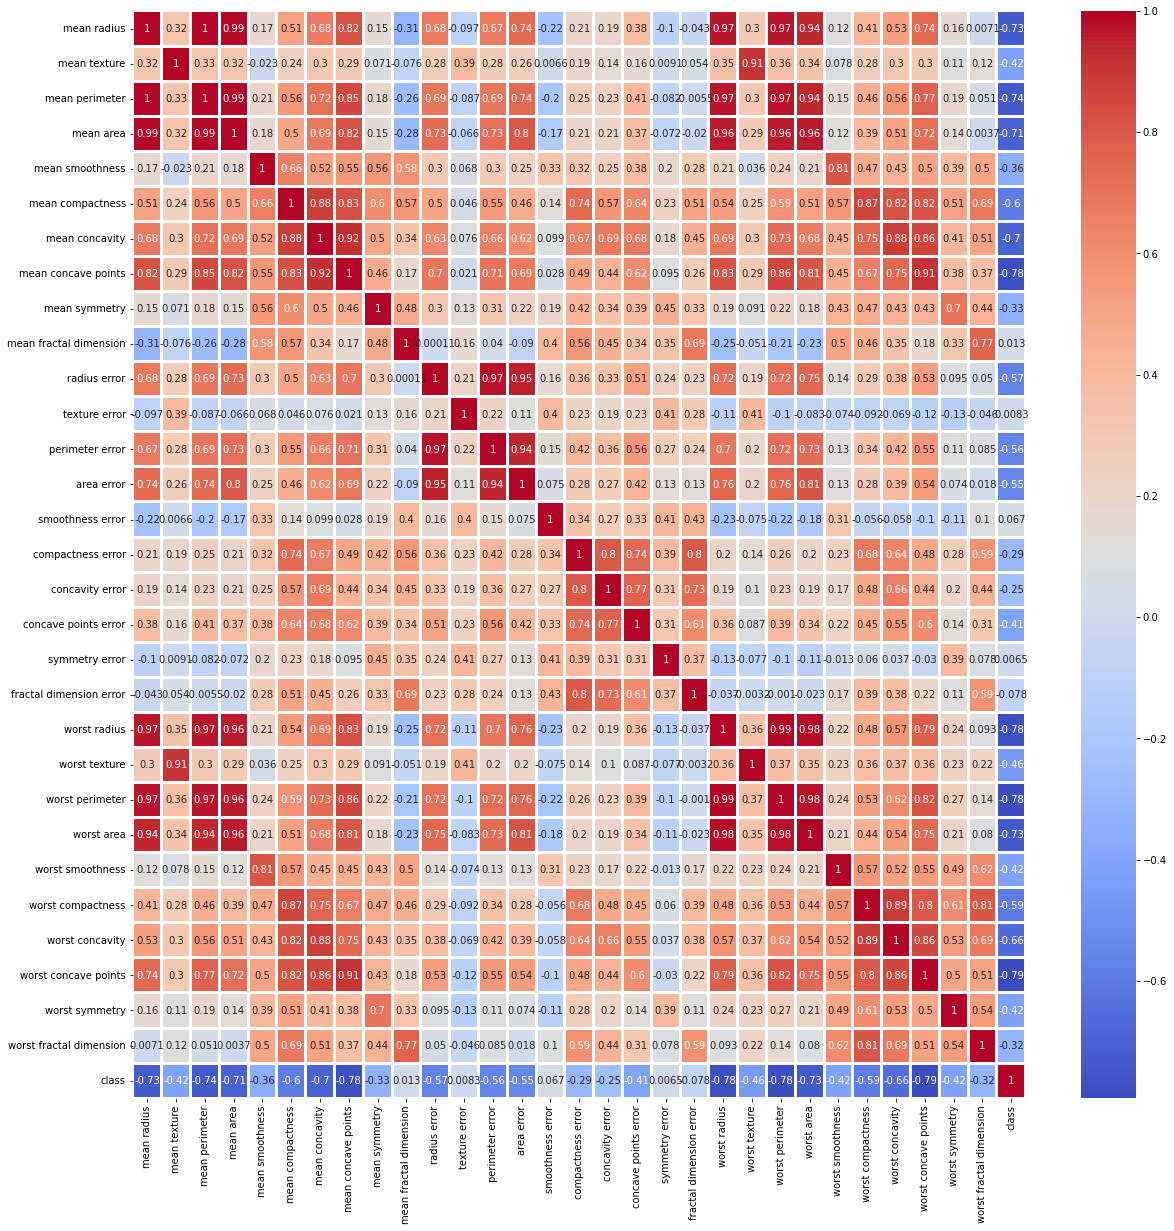

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap ='coolwarm', linewidths=2)

As we can see many of the features are highly correlated so we will find them out and drop them

In [18]:
#Function to find correlated values
def correlation(data,threshold):
  #using a set to avoid getting the same column name twice.
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        #Absolute value can also be taken to identify negatively correlated features using abs function
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [19]:
d=data.drop('class',axis=1)
columnname=correlation(d,0.95)

In [20]:
columnname

{'area error',
 'mean area',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst perimeter',
 'worst radius'}

In [21]:
len(columnname)

7

In [22]:
x=d.drop(columnname,axis=1)
y=data['class']

In [23]:
x

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 23 columns]

**Checking Number of benign and malignant cases**

In [24]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [25]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [26]:
data.groupby('class').mean()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
class                             ...                                         
0        17.462830     21.604906  ...        0.323468                 0.091530
1        12.146524     17.914762  ...        0.270246                 0.079442

[2 rows x 30 columns]

1 - Malignant

0 - Benign

Standardisation on independent variables

In [27]:
print(x)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 23 columns]


In [28]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Dividing data into train and test data using sklearn's train_test_split()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)

In [30]:
#checking dimension of target
print(y.shape, y_train.shape, y_test.shape)

(569,) (512,) (57,)


In [31]:
#checking dimension of features
print(x.shape, x_train.shape, x_test.shape)

(569, 23) (512, 23) (57, 23)


In [32]:
#checking mean of target
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [33]:
#checking mean of features
print(x.mean(), x_train.mean(), x_test.mean())

-6.688994043374673e-16 -0.002225693148122282 0.019992191084881143


In [34]:
x_train

array([[ 0.24502139,  0.65631472, -0.79778462, ...,  0.24657612,
         0.42425372,  0.47459119],
       [ 1.63669095,  0.22580731,  0.52233433, ...,  0.71098734,
        -0.56906357,  0.410863  ],
       [-1.03588263,  0.13272462,  0.75718029, ..., -0.71939922,
        -0.02872485, -0.35830855],
       ...,
       [-0.84843326, -1.21464725, -1.68094775, ..., -1.14787567,
        -0.52538349, -0.76284401],
       [-1.20742721,  0.02567953,  0.29460492, ..., -0.26062184,
        -0.45096559,  0.05287682],
       [-0.98760022,  1.3800326 ,  0.01492473, ..., -0.8107588 ,
         0.82222776, -0.13719944]])

Data is ready to be applied a machine learning algorithm

Logistic Regression
Implementing Logistic Regression without scaling

In [35]:
clf=LogisticRegression().fit(x_train,y_train)

Predicting seen data with our Logistic Regression ML model

In [36]:
train_pred=clf.predict(x_train)
train_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

Predicting unseen data with our Logistic Regression ML model

In [37]:
test_pred=clf.predict(x_test)
test_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

Checking Accuracy of Logistic Regression ML model with training data and testing data

In [38]:
train_accuracy=accuracy_score(y_train,train_pred)

In [39]:
test_accuracy=accuracy_score(y_test,test_pred)

In [40]:
print("Training accuracy: ",train_accuracy)
print("Testing accuracy: ",test_accuracy)

Training accuracy:  0.986328125
Testing accuracy:  0.9473684210526315


**Logistic Regression ML model Score**

In [41]:
clf.score(x_train,y_train)

0.986328125

In [42]:
clf.score(x_test,y_test)

0.9473684210526315

Lets Cross Validate and Check how the model performs.

In [43]:
#cross validation
print(cross_val_score(clf, x, y, cv=5))

[0.96491228 0.97368421 0.95614035 0.97368421 0.98230088]


Logistic Regression Model Has Performed Wonderfully After Feature Selection
Let's look a few more models to see how they perform

**SVM**

Implementing Support Vector Machine Algorithm

In [44]:
clf_svm=SVC(kernel='rbf').fit(x_train,y_train)

Predicting seen data with our SVM ML model

In [45]:
svmtrain_pred=clf_svm.predict(x_train)
svmtrain_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

Predicting unseen data with our SVM ML model

In [46]:
svmtest_pred=clf_svm.predict(x_test)
svmtest_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

Checking Accuracy of SVM ML model with training data and testing data

In [47]:
svmtrain_accuracy=accuracy_score(y_train,svmtrain_pred)
svmtest_accuracy=accuracy_score(y_test,svmtest_pred)

In [48]:
print("Training accuracy: ",svmtrain_accuracy)
print("Testing accuracy: ",svmtest_accuracy)

Training accuracy:  0.984375
Testing accuracy:  0.9824561403508771


SVM ML MODEL SCORE

In [49]:
clf_svm.score(x_train,y_train)

0.984375

In [50]:
clf_svm.score(x_test,y_test)

0.9824561403508771

In [51]:
#Cross validation
print(cross_val_score(clf_svm, x, y, cv=5))

[0.96491228 0.96491228 0.99122807 0.95614035 0.98230088]


**KNN**
Implementing K Nearest neighbors classifier

In [52]:
clf_knn=KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [53]:
#Predicting Seen data
trainknn_pred=clf_knn.predict(x_train)
trainknn_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [54]:
#Predicting Unseen Data
testknn_pred=clf_knn.predict(x_test)
testknn_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

Checking Accuracy of KNN ML model with training data and testing data

In [55]:
trainknn_accuracy=accuracy_score(y_train,trainknn_pred)
testknn_accuracy=accuracy_score(y_test,testknn_pred)

In [56]:
print("Training accuracy: ",trainknn_accuracy)
print("Testing accuracy: ",testknn_accuracy)

Training accuracy:  0.98046875
Testing accuracy:  0.9824561403508771


KNN ML MODEL SCORE

In [57]:
clf_knn.score(x_train,y_train)

0.98046875

In [58]:
clf_knn.score(x_test,y_test)

0.9824561403508771

In [59]:
#cross validation
print(cross_val_score(clf_knn, x, y, cv=5))

[0.97368421 0.96491228 0.96491228 0.94736842 0.9380531 ]


Comparing Out of Sample Accuracies

In [60]:
acc_dict={'LogisticRegression':test_accuracy,'SVM':svmtest_accuracy,'KNN':testknn_accuracy}

In [61]:
acc_dict

{'KNN': 0.9824561403508771,
 'LogisticRegression': 0.9473684210526315,
 'SVM': 0.9824561403508771}

Conclusion: As we can see all our models have performed brilliantly after feature selection and is giving good out of sample accuracy. Hence, there is no need for Optimization/Hyperparameter Optimization, So we can state that our model is ready to be deployed.